# Review analysis of Blue Bottle (2) - 데이터 분석
20.05.08
* 수집한 데이터를 분석하기
    * 데이터 수집한 코드: [크롤러 코드]()
* konlpy를 활용하여 리뷰를 분석해보자.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-가져오기" data-toc-modified-id="1.-데이터-가져오기-1">1. 데이터 가져오기</a></span></li><li><span><a href="#2.-데이터-전처리" data-toc-modified-id="2.-데이터-전처리-2">2. 데이터 전처리</a></span></li><li><span><a href="#3.-데이터-살펴보기" data-toc-modified-id="3.-데이터-살펴보기-3">3. 데이터 살펴보기</a></span><ul class="toc-item"><li><span><a href="#3-1.-각-지점-별-리뷰-수" data-toc-modified-id="3-1.-각-지점-별-리뷰-수-3.1">3-1. 각 지점 별 리뷰 수</a></span></li><li><span><a href="#3-2.-평점-수-확인" data-toc-modified-id="3-2.-평점-수-확인-3.2">3-2. 평점 수 확인</a></span></li><li><span><a href="#3-3.-지점-별-평균-평점" data-toc-modified-id="3-3.-지점-별-평균-평점-3.3">3-3. 지점 별 평균 평점</a></span></li></ul></li><li><span><a href="#4.-리뷰-분석하기" data-toc-modified-id="4.-리뷰-분석하기-4">4. 리뷰 분석하기</a></span><ul class="toc-item"><li><span><a href="#4-1.-워드클라우드-만들기" data-toc-modified-id="4-1.-워드클라우드-만들기-4.1">4-1. 워드클라우드 만들기</a></span><ul class="toc-item"><li><span><a href="#4-1-1.-전체-리뷰로-워드클라우드-만들기" data-toc-modified-id="4-1-1.-전체-리뷰로-워드클라우드-만들기-4.1.1">4-1-1. 전체 리뷰로 워드클라우드 만들기</a></span></li><li><span><a href="#4-1-2.-긍정-리뷰와-부정-리뷰-비교해보기" data-toc-modified-id="4-1-2.-긍정-리뷰와-부정-리뷰-비교해보기-4.1.2">4-1-2. 긍정 리뷰와 부정 리뷰 비교해보기</a></span></li></ul></li></ul></li><li><span><a href="#5.-리뷰의-긍정,-부정-예측하기" data-toc-modified-id="5.-리뷰의-긍정,-부정-예측하기-5">5. 리뷰의 긍정, 부정 예측하기</a></span></li></ul></div>

## 1. 데이터 가져오기

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook
from collections import Counter

In [104]:
plt.rc('font', size=14)
plt.rc('font', family='NanumGothic')

In [71]:
df = pd.read_csv('source/Bluebottle_review/data.csv', index_col=0)
df.head()

,cafe,review,score
0,블루보틀 역삼점,불친절해요. 배가 불렀는듯,2점
1,블루보틀 역삼점,아메리카노도 맛있고 놀라플로트도 맛있어요!! 사람만 안많으면 자주오고싶어요,5점
2,블루보틀 역삼점,좋습니다,5점
3,블루보틀 역삼점,쏘쏘. 그냥 테이크아웃하기 좋음,3점
4,블루보틀 역삼점,편히 머물 수 있는 공간은 아닌. 커피는 우유들어간건 맛있어요.. 디저트는 메종엠오,2점


In [72]:
len(df)

204

* 총 204개의 리뷰가 불러와졌다.

## 2. 데이터 전처리
* cafe에 '블루보틀'을 삭제하고, 어느 지점인지만 표기하자.
* score를 숫자 형태로 변경하자

In [73]:
# cafe 컬럼 내 '블루보틀' 삭제
df['cafe'] = [s[5:] for s in df['cafe']]

# score 컬럼 '점' 삭제
df['score'] = [s[0] for s in df['score']]
df['score'] = df['score'].astype('int')

In [74]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 3 columns):
cafe      204 non-null object
review    204 non-null object
score     204 non-null int32
dtypes: int32(1), object(2)
memory usage: 5.6+ KB
None


,cafe,review,score
0,역삼점,불친절해요. 배가 불렀는듯,2
1,역삼점,아메리카노도 맛있고 놀라플로트도 맛있어요!! 사람만 안많으면 자주오고싶어요,5
2,역삼점,좋습니다,5
3,역삼점,쏘쏘. 그냥 테이크아웃하기 좋음,3
4,역삼점,편히 머물 수 있는 공간은 아닌. 커피는 우유들어간건 맛있어요.. 디저트는 메종엠오,2


## 3. 데이터 살펴보기
* 리뷰 분석을 하기 전에, 데이터를 살펴보자.

### 3-1. 각 지점 별 리뷰 수

성수점     90
삼청한옥    65
역삼점     25
압구정점    19
한남점      3
삼청점      2
Name: cafe, dtype: int64


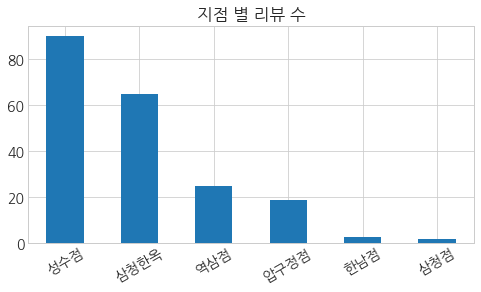

In [75]:
reviews_by_cafe = df.cafe.value_counts().sort_values(ascending=False)
print(reviews_by_cafe)
plt.figure(figsize=(8, 4))
reviews_by_cafe.plot('bar')
plt.xticks(rotation=30)
plt.title('지점 별 리뷰 수')
plt.show()

* 1호점인 성수점이 가장 리뷰가 많다.
* 그 다음으로는 삼청동에 위치한 지점이 많았다.
    * 삼청 지점이 두 곳인데, '삼청점'은 블루보틀에서 한국 맞춤으로 디저트 페어링을 제공하는 프라이빗 카페이다.
* 한남점은 리뷰가 3건에 불과하다.
    * 20년 3월에 오픈하여 아직 2달 밖에 되지 않은 것이 원인으로 판단된다.
        * 현재는 20년 5월!

### 3-2. 평점 수 확인
* 몇점을 가장 많이 받았는지 확인해보자.

1    62
2    34
3    44
4    27
5    37
Name: score, dtype: int64


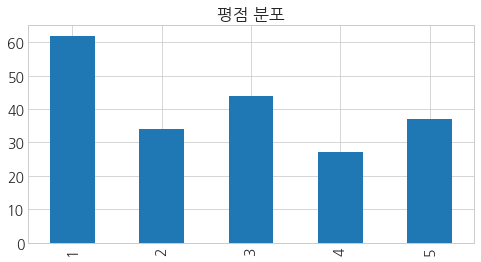

In [76]:
score_counts = df.score.value_counts().sort_index()
print(score_counts)
plt.figure(figsize=(8, 4))
score_counts.plot('bar')
plt.title('평점 분포')
plt.show()

### 3-3. 지점 별 평균 평점

         score
cafe          
삼청점   3.500000
역삼점   2.920000
성수점   2.788889
삼청한옥  2.738462
한남점   2.333333
압구정점  2.052632


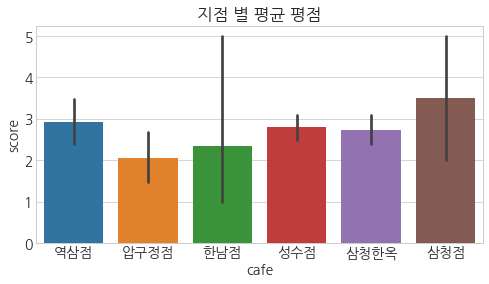

In [77]:
avg_score_by_cafe = df.groupby('cafe').mean().sort_values('score', ascending=False)
print(avg_score_by_cafe)
plt.figure(figsize=(8, 4))
sns.barplot('cafe', 'score', data=df)
plt.title('지점 별 평균 평점')
plt.show()

* 성수, 삼청한옥점을 제외하면 리뷰 수 자체가 적어서 큰 의미는 없지만,
    * 그럼에도 불구하고 삼청점을 제외하면 모두 3점이 되지 않는다.
* 블루보틀은 '일본 가면 꼭 가야하는 카페' 혹은 '미국 서부 인생 카페' 등으로 불렸었다.
    * 당시 한국에는 없기도 했고, 지점을 공격적으로 확보하지 않는 브랜드였기 때문에...
* 성수동에 1호점이 생길 당시, 엄청나게 큰 이슈를 불러왔고 수많은 사람들을 불러모았었다.
    * 오픈 몇 시간 전부터 사람들이 엄청 많이 모여있었다.
* 이런 브랜드가 **왜 낮은 평점을 받고있는 것일까?**

## 4. 리뷰 분석하기
* 리뷰를 살펴보면 사람들이 왜 블루보틀에 냉담한 반응을 보이는지 알 수 있을 것 같다.
* konlpy 라이브러리를 활용하여 리뷰의 감정을 분석해보자.

### 4-1. 워드클라우드 만들기
* 리뷰에서 어떤 단어가 많이 나오는지 찾아서 시각화해보자.

#### 4-1-1. 전체 리뷰로 워드클라우드 만들기
* 일단, 리뷰 전반적으로 어떤 단어가 많이 나오는지 알아보자.

In [78]:
from konlpy.tag import Okt
okt = Okt()

In [106]:
df.review


In [111]:
# data를 넣으면 단어의 수를 집계하고 정렬하여 dict로 반환
def commonWordDict(words):
    lists = [s for s in words]
    morphs, word_list = [], []
    
    for sentence in tqdm_notebook(lists): 
        morphs.append(okt.pos(sentence)) 

    for sentence in morphs:
        for word, tag in sentence:
            if tag != 'Josa' and tag != 'Punctuation':
                word_list.append(word)

    count = Counter(word_list)
    return dict(count.most_common())

In [112]:
words = commonWordDict(df.review)

In [128]:
from wordcloud import WordCloud
def makeWordcloud(words, cmap='RdBu', title=None):
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf', background_color='white',
                          width=1500, colormap=cmap, height=1000).generate_from_frequencies(words)
    plt.figure(figsize=(15, 8))
    plt.title(title)
    plt.imshow(wordcloud)

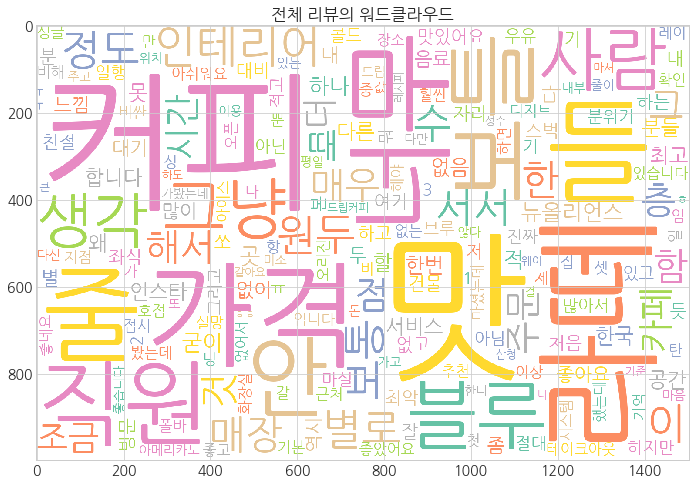

In [129]:
makeWordcloud(words, 'Set2', '전체 리뷰의 워드클라우드')

* 가장 많이 나오는 단어들을 살펴보면,
    * 커피, 라떼: 카페이니 당연히 커피가 많이 언급되는 것은 당연하다. 그리고 블루보틀의 대표메뉴인 라떼도 자주 등장했다.
    * 맛: 맛에 대해 많이 언급되는데, 긍정인지 부정인지는 알 수 없다.
    * 가격, 줄, 직원: 음료 외의 요소들이 많이 언급되었다.
        * 가격: 블루보틀은 상대적으로 가격이 비싼데, 해당 부분이 언급된 듯 하다.
        * 줄: 요즘엔 덜하지만, 한 번 맛을 보려면 줄을 길게 서야해서?
        * 직원: 직원들이 불친절하다는 이야기가 종종 있는데, 긍정인지 부정인지는 확인할 수 없다.

#### 4-1-2. 긍정 리뷰와 부정 리뷰 비교해보기
* 이번에는 긍/부정의 워드클라우드를 따로 만들어서 비교해보자.
* 긍정: 평점 4, 5점을 받은 리뷰
* 부정: 평점 1, 2점을 받은 리뷰

In [139]:
pos_review = df[df.score>3].review
neg_review = df[df.score<3].review

print('긍정 리뷰: {}건\n부정 리뷰: {}건'.format(len(pos_review), len(neg_review)))

긍정 리뷰: 64건
부정 리뷰: 96건


In [141]:
pos_word = commonWordDict(pos_review)
neg_word = commonWordDict(neg_review)

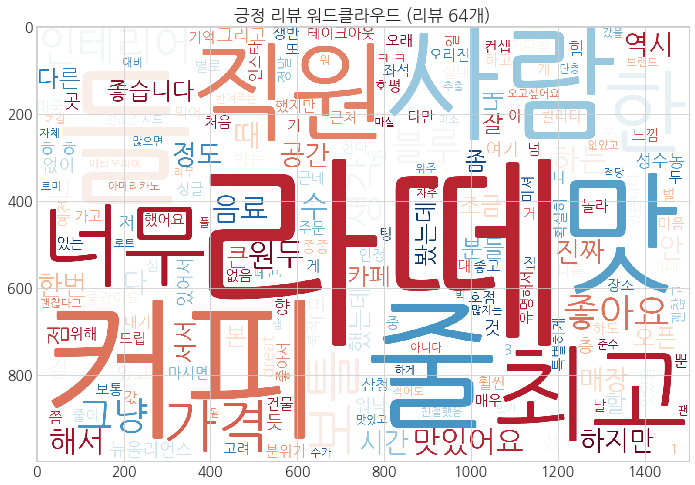

In [147]:
makeWordcloud(pos_word, 'RdBu_r', title='긍정 리뷰 워드클라우드 (리뷰 {}개)'.format(len(pos_review)))

* 긍정 리뷰에는 라떼가 가장 많이 나왔다.
    * 맛, 좋아요, 최고, 커피 등의 키워드가 라떼의 맛에 만족했다는 것을 반증하는 것으로 보인다.
* 줄 이라는 키워드가 있는데, 긍정적인 내용으로 해석하기가 어렵다.
    * 어떤 내용이 있는지 살펴보자.    

In [152]:
for s in pos_review:
    if '줄' in s: print(s,'\n')

에티오피아 리무 두로미나 워시드 드립 생두 단가를 고려할때 가격은 적당. 추출자체도 준수하게 잘됨.  가격대비 퀄리티는 브랜드값 떼고도 괜찮다고 생각한다. 적어도 내가 본 직원은 친절했음. 다만 여길 밖까지 줄서서 마실 정도는 아니다.  그냥 괜찮은 카페일뿐.  내가 갔을 땐 줄이 없었고. 실내 좌석수가 많지는 않다. 단층이고 테이크아웃 위주로 고려하고 만... 

블루보틀 역삼보다 넓은데 인테리어나 조명이 훨씬 떨어짐 의자도 너무 없고,, 줄서서 먹어서 더 정신없음 커피맛은 비슷하나 아이스크림 너무적게주고 지점마다 차이가 있는듯 

라떼를 그닥 좋아하지 않는데도 맛있었어요. 줄만 오래 기다리지 않으면 종종와서 먹을것 같네용. 스콘은 제취향 아니었음 ㅜ 

줄 없음 뉴올리언스 짱 맛있음 

줄서는게 좀 힘들었긴 했는데... 라떼 시켰는데 진짜 먹어본 것 중에서 젤 맛있었음!! 

네이버 블루보틀 뉴스에 줄서는거 욕하는 방구석 댓글충들 한심 ㅋㅋ 왤케 베베꼬였냐... 불쌍하기도 하고.. 

줄 서는 재미가 있습니다 

긴줄 더운날에도 친절응대하시는 직원분들 땜에 별줌.뉴올리언즈는 평범  원두를 사와 집머쉰서 내려먹었는데 원두 퀄은 좋음!이원두로  그래서 애플이라는 

한 여름 대낮에 줄을 서서 커피를 마신다는 것이 얼마나 열정이 있어야 하는 일인지... 오후 5시쯤 되니 오히려 줄이 줄었다.   층마다 바리스타가 있고, 굉장히 기능에 집중 한 공간.  그리고, 점점 높아져가는 커피가격.  

사람들이 다 한방향으로 달려가길래 나는 무슨 연예인이 온 줄 알았다 이 땡볕에도 간판과 사진을 찍기 위해 그리고 가게 안으로 들어가기 위해 줄을 서있다 대한민국사람들 정말 위대하다 



* 줄을 서서 마셨다, 줄을 기다릴 만 했다 등의 내용이다.
    * 근데 중요한건 어쨋든 '줄을 섰다'라는 것!

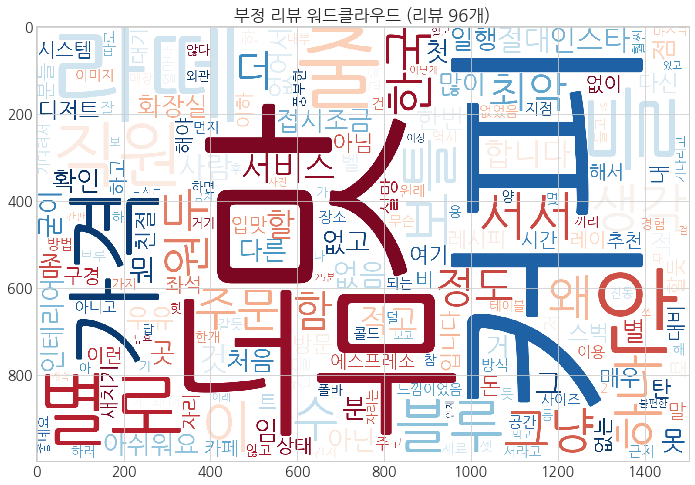

In [149]:
makeWordcloud(neg_word, title='부정 리뷰 워드클라우드 (리뷰 {}개)'.format(len(neg_review)))

* 부정적인 리뷰에서는 맛과 커피라는 단어가 가장 많이 나왔다.
    * 기대했던 것보다 맛이 별로였다는 내용이 주를 이루지 않을까?
    * 아래에서 맛이라는 단어를 포함한 부정 리뷰를 확인해보자.

In [156]:
for s in neg_review:
    if '맛' in s: print(s,'\n')

편히 머물 수 있는 공간은 아닌. 커피는 우유들어간건 맛있어요.. 디저트는 메종엠오 

이슈가 많길래 호기심에 가봤는데 커피가 생각 외로 맛도 없고;; 또 불친절해서 놀랐어요. 그리고 가격 너무 비싸서 좀 황당할정도... ㅎ위치도 별로고... 양도 적고...  

다른 지점보다 탄맛이 더 많이남 

블루보틀 한국은 ㄴㄴㄴ  맛부터 별로입니다.  사이즈도 너무 적고  가격은 비싸고   

뉴 올리언즈 맛이 매우 이상함. 레시피 대로 안만드는게 분명함. 뉴올리언즈는 미국 온라인에도 적량 레시피 재료와 만드는 방법이 나와있을 정도로 레시피가 매우 중요한데 분명 재료를 덜 써서 난든 맛이남. 본사에서 확인해 봐야 할 맛임.  

첫 블루보틀 커피맛은 그냥 그랬다 특별한 건 없었음  일행은 여기도 점바점 같다고..  다른 지점이랑 맛 차이가 많이 난다고 함  인스타용으로 쓰기엔 인테리어도 안이뽀.. 별 거 없음  그래서 커피만 찍었지 모야 

여기 시스템이 왜이런가요? 커피,디저트 하나씩 주문하고 디저트 먼저 받았는데 트레이 하나 없이 접시에 주네요 좌석은 2층에 배치되어있어서 올라가기도 애매하고 벨도 없어서 그상태로 기다려서 커피 받아가야되는데 트레이 없이 접시하나만 달랑 든 상태로 커피기다렸구요 커피도 역시 트레이 없이 나옴^^ 각각 접시를 양 손으로 따로 들고 갔습니다. 커피 맛은 좋네요^... 

블루보틀커피에 대한 명성이 자자했던터라 회사 근처에 생겼다는 소문을 듣고 방문했음. 주로 라떼를 선호하여 6,100원을 내고 마셔봤는데, 첫맛은 쓰지않고 좋았으나 이후 심심한 맛이였음. 도산공원 근처에 펠트커피의 4,500원짜리 라떼가 훨씬 진하고 풍부한 맛을 내어 내 입맛에 맞았음. 라떼 특성상 우유로 희석되는 부분이 있어 아메나 다른 커피는 다를 수 있... 

건물밖에 줄 세워놓고 엠디 하나 구경하러 들어가려면 줄서라고 호들갑. 무슨 대단한 맛도 아닌커피 귀빈 영접하듯 들어가지도 못하게해 ㅋㅋ 

커피는 맛있는데 직원들끼리 친해서 자기들끼리 웃긴 얘기하느라 불러도

* 맛이 없다는 리뷰가 대다수였으며, 조금 심한 표현들도 보인다.
    * 긍정적인 리뷰에서는 맛있다는 사람들이 많았는데, 부정적인 리뷰에서는 맛이 없다고 한다.
* 크게 이유는 세 가지로 생각해볼 수 있다.
    1. 정말 맛이 없다.
        * 단순 호불호라고도 할 수 있겠다.
        * 근데, 성수동 기준으로 유명한 카페들과 비교했을때에 블루보틀은 평점이 낮은 편임을 감안하면,
        * 단순히 호불호만은 아닐 것 같다.
    2. 기대했던 것보다 맛이 없다.
        * 블루보틀이 이슈화가 되며 큰 기대를 갖고 있었는데, 그 기대에 만족하지 못했다.
    3. 해외의 블루보틀보다 맛이 없다.
        * 해외 여행이 가져다주는 경험의 미화도 있었겠지만, 한국 블루보틀이 맛이 없다는 평이 꽤 보인다.
        * 원두가 다르거나, 사람이 몰려서 바리스타의 케파가 부족하다거나 등의 원인이 있을 수 있겠다.
- - - - -
**결국 중요한 것은 맛이다.**
* 어떤 원인이든, 중요한 것은 맛이 없다고 느끼고 있고, 
* 그것이 부정적인 평가에서 가장 큰 원인일 수 있다는 것이다.
* 블루보틀의 명성을 한국에서도 이어나가기 위해서는,
    * 고객들이 블루보틀은 맛이 없다고 생각한다는 것을 인지해야하고,
    * 이것을 개선하고자 하는 노력이 필요할 것이다.

## 5. 리뷰의 긍정, 부정 예측하기
* 지금까지는 3점을 제외한 평가들의 리뷰를 분석해보았다.
* 이번에는 중립적인 리뷰라고 할 수 있는 3점 리뷰가 긍정/부정적인지 예측해보는 모델을 만들어보자.

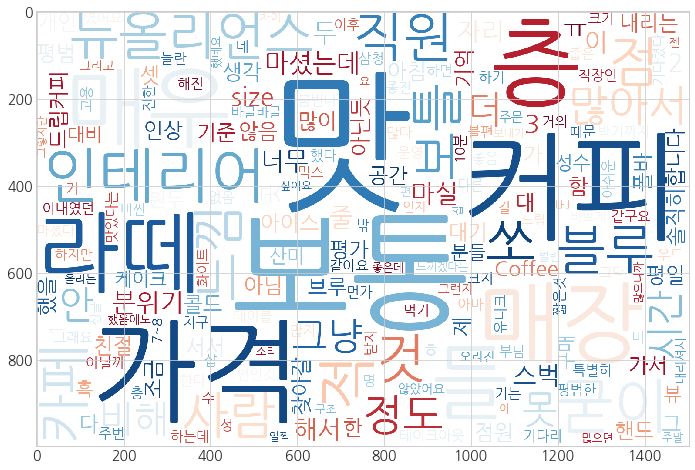

In [158]:
makeWordcloud(commonWordDict(df[df['score']==3].review))